In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import os

['camCalib\\Photo-1.jpeg', 'camCalib\\Photo-10.jpeg', 'camCalib\\Photo-11.jpeg', 'camCalib\\Photo-12.jpeg', 'camCalib\\Photo-13.jpeg', 'camCalib\\Photo-14.jpeg', 'camCalib\\Photo-15.jpeg', 'camCalib\\Photo-16.jpeg', 'camCalib\\Photo-17.jpeg', 'camCalib\\Photo-18.jpeg', 'camCalib\\Photo-19.jpeg', 'camCalib\\Photo-2.jpeg', 'camCalib\\Photo-20.jpeg', 'camCalib\\Photo-21.jpeg', 'camCalib\\Photo-22.jpeg', 'camCalib\\Photo-3.jpeg', 'camCalib\\Photo-4.jpeg', 'camCalib\\Photo-5.jpeg', 'camCalib\\Photo-6.jpeg', 'camCalib\\Photo-7.jpeg', 'camCalib\\Photo-8.jpeg', 'camCalib\\Photo-9.jpeg']


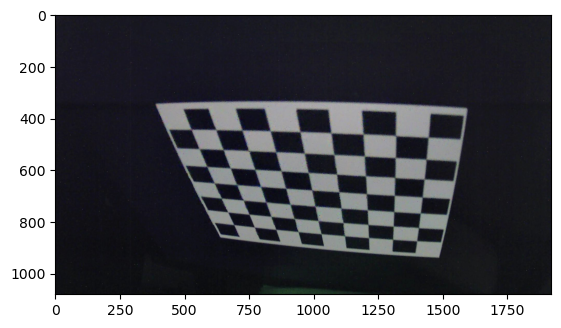

In [8]:
calibration_images = glob.glob('camCalib/*.jpeg')
print(calibration_images)

plt.imshow(mpimg.imread(calibration_images[21]))
plt.show()

In [53]:
rows = 6
columns = 9
square_size = 12 #24 #expressed in mm

objp = np.zeros((rows*columns,3), np.float32)
objp[:,:2] = np.mgrid[0:columns, 0:rows].T.reshape(-1,2)*square_size
#print(objp)

In [54]:
def get_points(calibration_images, objp, rows=6, columns=9):
    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(calibration_images):
        image = cv2.imread(fname)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (columns,rows), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(image, (9,6), corners, ret)
            print(image.shape)
            plt.imshow(image)
            plt.show()
            cv2.waitKey(500)
    return objpoints, imgpoints

(1080, 1920, 3)


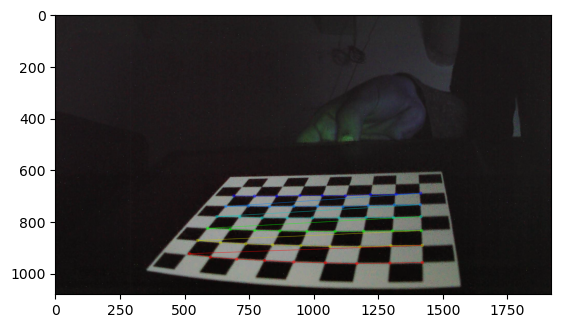

[0. 0. 0.]
[[691.7551 701.1654]]


In [55]:
objpoints, imgpoints = get_points(calibration_images, objp)

print(objpoints[0][0])
print(imgpoints[0][0])
cv2.destroyAllWindows()

In [64]:
img_shape = (1080, 1920)
#flags = (cv2.CALIB_FIX_K1 + cv2.CALIB_FIX_K2 + cv2.CALIB_FIX_K3)
flags = (cv2.CALIB_RATIONAL_MODEL)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None, flags=flags)

print("-- Camera Parameters --")
print("Root Mean Squared Error")
print(ret)
print("")
print("Camera Matrix")
print(mtx)
print("")
print("Distorion Coefficients Matrix")
print(dist)
print("")
print("Rotation Vector")
print(rvecs)
print("")
print("Translation Vector")
print(tvecs)

-- Camera Parameters --
Root Mean Squared Error
1.7799700853518112

Camera Matrix
[[1.69856073e+03 0.00000000e+00 7.12778204e+02]
 [0.00000000e+00 2.57140860e+03 7.89658409e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distorion Coefficients Matrix
[[ 3.77291365e+00 -4.33463719e+01 -3.51017942e-02  1.03353352e-01
   1.85743149e+02  5.73382178e+00 -5.50897220e+01  2.32076279e+02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

Rotation Vector
(array([[-1.23344305],
       [ 0.30931347],
       [ 0.24127044]]),)

Translation Vector
(array([[ -2.97662109],
       [ -8.24906752],
       [240.78262199]]),)


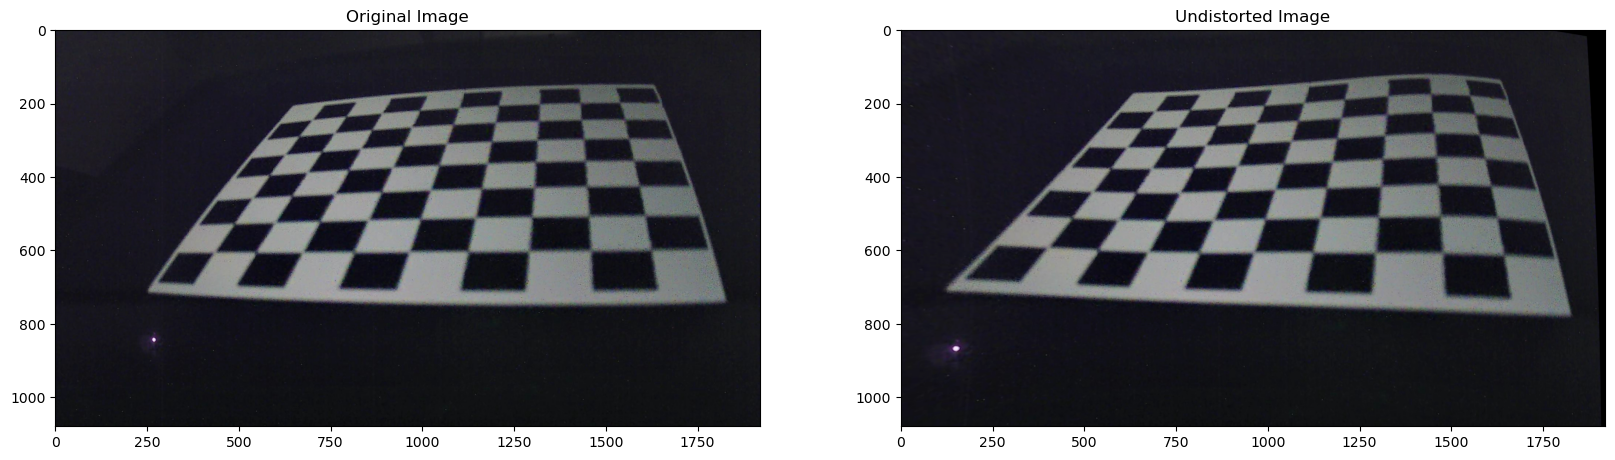

In [59]:
img = mpimg.imread(calibration_images[3])
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

## Display the image before and after distortion
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,10))
ax0.imshow(img)
ax0.set_title("Original Image")
ax1.imshow(undistorted)
ax1.set_title("Undistorted Image")
plt.show()